# PFP90 Open Science: Acceso abierto, gestión de datos e investigación

## 9. Investigación Reproducible

### Ejemplo de un documento que combina texto, datos y algoritmos con un enlace fuerte

Este documento está desarrollado utilizando Python Notebook. Se trata de un ejemplo muy sencillo que puede ser razonablemente accesible incluso para personas que no programan en este lenguaje. 

In [1]:
# Se cargan algunas librerías utilizadas por el programa
import sys
import numpy as np
import pandas as pd
from IPython.display import Image, HTML, SVG, YouTubeVideo

In [2]:
# Se imprimen las versiones de las librerias para informar
# sobre el entorno en el que se ha desarrollado.
print('Version Python: ' + sys.version)
print('Version Pandas: ' + pd.__version__)
print('Version Numpy: ' + np.__version__)

Version Python: 3.8.5 (default, Sep  4 2020, 00:03:40) [MSC v.1916 32 bit (Intel)]
Version Pandas: 1.2.1
Version Numpy: 1.19.2


### Introducción y objetivos de este documento

El objetivo de este documento es mostrar las posibilidades que ofrece una herramienta como Jupyter Notebook en el desarrollo de documentos basados en el paradigma de la Investigación Reproducible. Se trata, por tanto, de un documento con enlaces fuertes entre el texto, datos y algoritmos utilizados.

El **documento** analiza el comportamiento de un dado, que ha sido lanzado 10 veces (**experimento**). Los resultados del experimentos (**datos experimentales**) están disponibles en un repositorio. No se trata de un repositorio específico para la publicación de datos en abierto pero nos servirá para ilustrar el ejercicio. Los datos son analizados mediante un **algoritmo** muy sencillo que obtiene la moda y el histograma. 

### Metodología

Un dado con seis caras numeradas de 1 a 6 es lanzado $N$ veces. De los $N$ resultados obtenidos se obtendrá el promedio, la mediana y la moda:

**Moda**: Es el valor que se repetido más veces en la lista de resultados.

**Mediana**: Representa el valor que se encuentra en el centro de la lista de resultados una vez ordenados.

**Promedio o Media**: Se obtiene como la suma de los resultados obtenidos dividida entre el número total de lanzamientos realizados $N$.

$\bar{X} = \frac{\sum_{i=1}^{N} x_i}{N}$

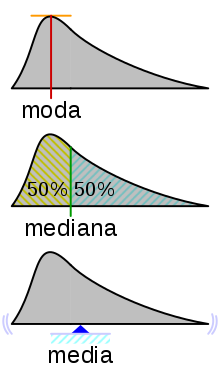

In [3]:
Image(filename='figuras/valores_estadisticos.png',width=100)

In [4]:
# Se define la función para calcular la moda
def moda(datos):
    # variable auxiliar para almacenar el resultado más frecuente
    repeticiones = 0
    for i in datos:
        n = np.count_nonzero( datos == i)
        if n > repeticiones:
            repeticiones = n

    moda = [] 

    for i in datos:
        n = np.count_nonzero( datos == i) 
        if (n == repeticiones) and (i not in moda):
            moda.append(i)

    #if len(moda) != len(datos):
        # print('Moda: ', str(moda))
    #else:
        # print ('La serie de resultados no tiene moda')
    
    return( moda)

In [5]:
def mediana(datos):
    datos.sort() #.sort Ordena los valores de la lista de resultados

    if len(datos) % 2 == 0:
        n = len(datos)
        x_mediana = (datos[int(n/2) - 1] + datos[int(n/2)]) / 2
    else:
        x_mediana = datos[len(datos) / 2]

    return( x_mediana)

In [6]:
# Se define la función para calcular el promedio
def promedio(datos):
    sumatorio = sum(datos)
    Ndatos = float(len(datos))
    resultado = sumatorio / Ndatos
    return( resultado)

### Set-up

Este es nuestro equipamiento científico...

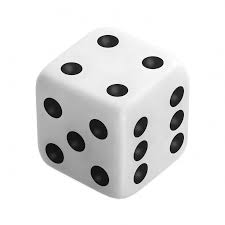

In [7]:
Image(filename='figuras/dado.jpg',width=100)

### Resultados de la serie de lanzamientos

El dado se lanza $N$=10 veces. Los resultados se almacenan en un fichero que está disponible en el enlace siguiente (en un experimento científico relevante los datos pueden almacenarse en un repositorio de datos abierto):

In [8]:
url = 'https://raw.githubusercontent.com/mmanana/data/master/experimento_dados.csv'
df = pd.read_csv(url,sep=";")

In [9]:
df

,Lanzamiento,Resultado
0,1,4
1,2,3
2,3,5
3,4,2
4,5,6
5,6,3
6,7,2
7,8,4
8,9,1
9,10,2


In [10]:
datos = df['Resultado'].to_numpy()
datos

array([4, 3, 5, 2, 6, 3, 2, 4, 1, 2], dtype=int64)

In [11]:
x_moda = moda( datos)
print('Moda: ' + str(x_moda))

Moda: [2]


In [12]:
x_mediana = mediana( datos)
print('Mediana: ' + str(x_mediana))

Mediana: 3.0


In [13]:
x_promedio = promedio( datos)
print('Promedio: ' + str(x_promedio))

Promedio: 3.2
